# Logistic Regression

## Setting Working Directory

In [21]:
from os import chdir

chdir("C:\\Users\\Lenovo\\Documents\\Udemy\\Project - Breast Cancer Classification")

## Importing the libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

The data file is a .DATA file.

In [23]:
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.columns = [
    "ID", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion",
    "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
    "Normal Nucleoli", "Mitoses", "Class"
]

## Checking for missing data

Since some missing values are encoded as "?", let us replace it with NaN to take care of missing data.

In [24]:
df = df.replace("?", np.NaN)

In [25]:
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

We see that "Bare Nuclei" is an object. Therefore, we know that its intergers might be in string format. Therefore, we must convert it to a numeric format.

In [26]:
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])

In [27]:
df.dtypes

ID                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Now, let us check which columns have missing data.

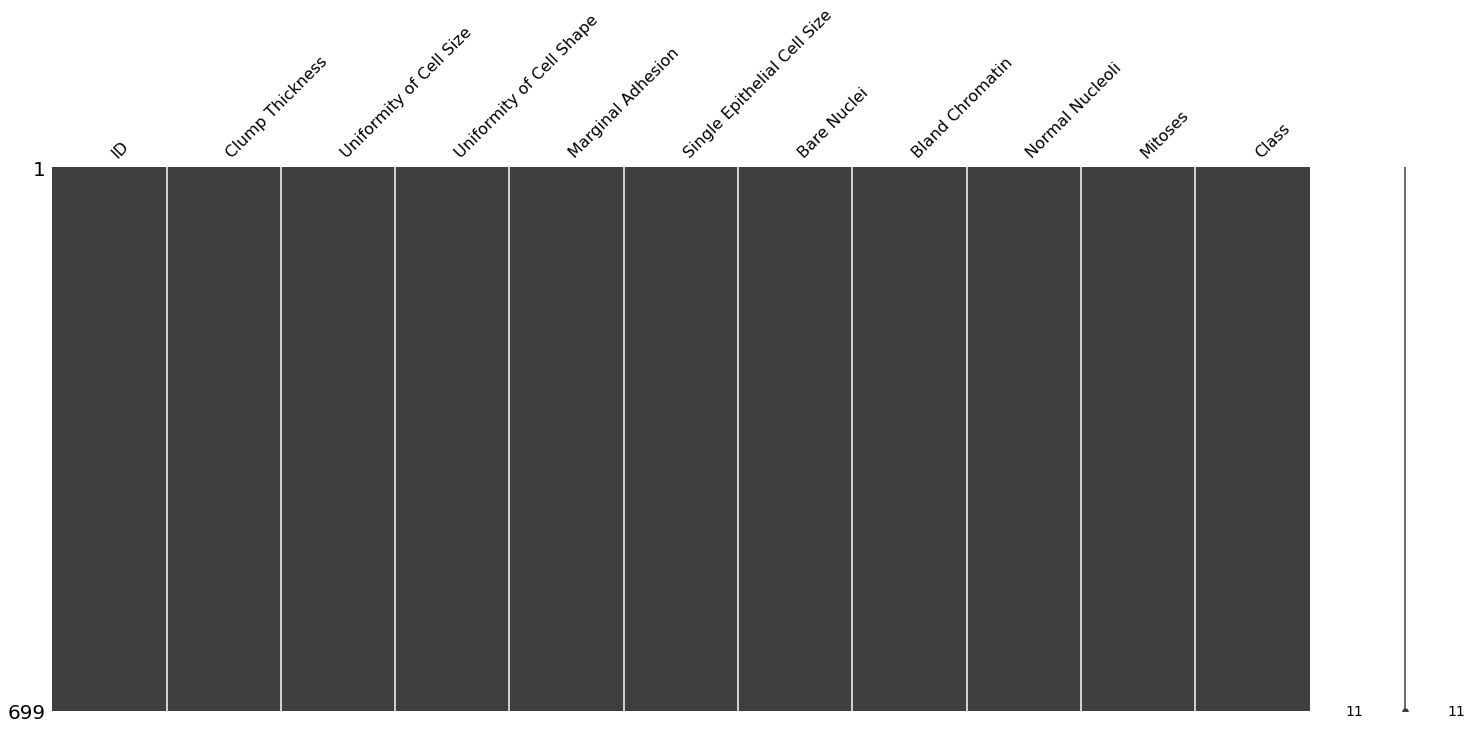

In [64]:
from missingno import matrix

matrix(df);

Therefore, we have missing values in the "Bare Nuclei" variable. Let us use the mean imputation method to tackle this issue. We know that it is the 6th index in our dataframe.

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(df[["Bare Nuclei"]])
df[["Bare Nuclei"]] = imputer.transform(df[["Bare Nuclei"]]).ravel()

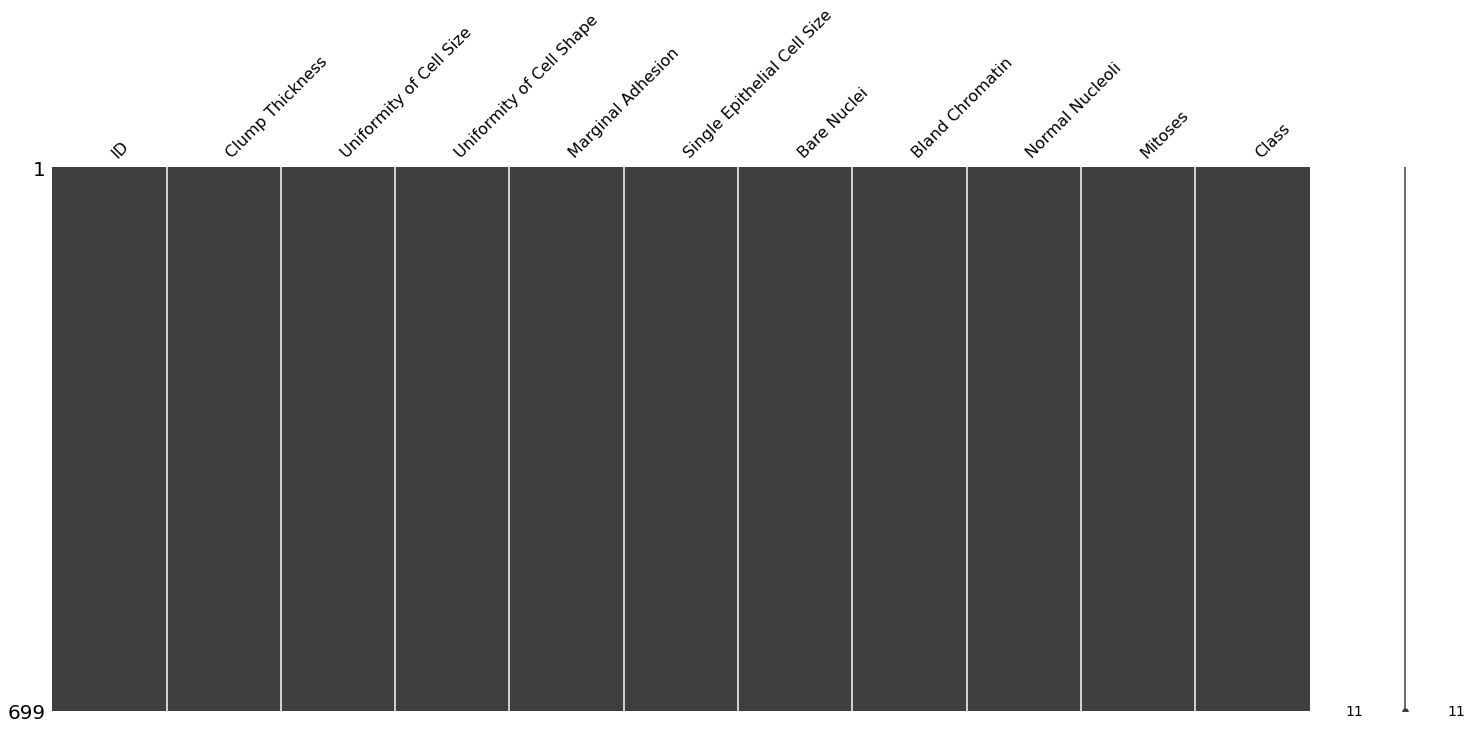

In [33]:
from missingno import matrix

matrix(df);

## Descriptive Statistics

Inspecting first 5 rows

In [28]:
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Data Description

In [29]:
df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Choosing our dependent and independent variables

In [41]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [11]:
print(X[:5])

[[ 5.  1.  1.  1.  2.  1.  3.  1.  1.]
 [ 5.  4.  4.  5.  7. 10.  3.  2.  1.]
 [ 3.  1.  1.  1.  2.  2.  3.  1.  1.]
 [ 6.  8.  8.  1.  3.  4.  3.  7.  1.]
 [ 4.  1.  1.  3.  2.  1.  3.  1.  1.]]


In [12]:
print(y[:5])

[2 2 2 2 2]


## Boxplots

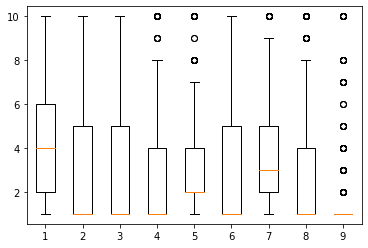

In [42]:
plt.boxplot(X);

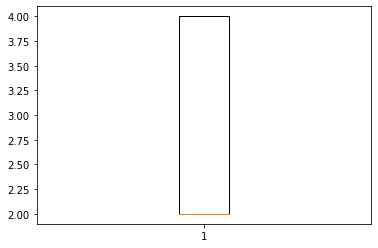

In [43]:
plt.boxplot(y);

## Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=192)

## Training the Logistic Regression model on the Training set

In [45]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=192)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=192)

## Predicting the Test set results

In [47]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cmtx = pd.DataFrame(cm, index=["true-benign", "true-malignant"], 
                    columns=["pred-benign", "pred-malignant"])
print("Confusion Matrix:")
print(cmtx)

accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print ("\nAccuracy: {:.2f}%".format(accuracy*100))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print ("Sensitivity: {:.2f}%".format(sensitivity*100))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print ("Specificity: {:.2f}%".format(specificity*100))

Confusion Matrix:
                pred-benign  pred-malignant
true-benign              96               2
true-malignant            2              40

Accuracy: 97.14%
Sensitivity: 97.96%
Specificity: 95.24%


## 10-Fold Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 96.06%
Standard Deviation: 2.50%
